# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

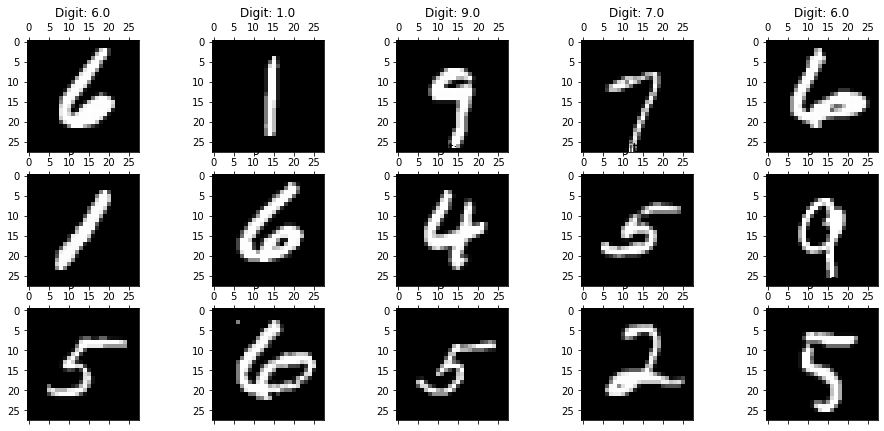

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [8]:
df.describe()     # df의 요약통계량 확인

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [ ]:
# 최대값이 커서 scaling 필요

In [9]:
X_scaled = X / 255  

In [10]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.2,     # train_size 0.8, test_size 0.2
                                                    random_state = 22)


In [13]:
print(X_train.shape)    
print(X_test.shape)

(56000, 784)
(14000, 784)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [15]:
from sklearn.decomposition import PCA


In [16]:
# elbow point 확인

In [17]:
pca = PCA(n_components=X.shape[1], copy=False)
pca_x = pca.fit_transform(X_train)
pca_x

array([[ 5.52665602e-01,  3.04237000e+00, -1.38030126e+00, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.08406483e+00,  1.41470955e+00,  2.56558359e+00, ...,
        -1.73207342e-16,  3.52370517e-16, -3.45656028e-17],
       [ 2.60784825e+00,  6.13950808e-02,  3.78328026e+00, ...,
         5.65043180e-16, -1.28572027e-15, -1.36917672e-17],
       ...,
       [-2.62410719e+00, -1.92141202e-01, -2.53052614e+00, ...,
        -6.42639660e-18,  9.43368351e-19,  3.02389391e-18],
       [-1.97856795e+00,  2.13671760e+00,  1.16761286e-01, ...,
        -7.76351082e-18, -2.60165062e-18,  2.14531613e-18],
       [-1.30034201e+00,  2.23004879e-01, -1.62702615e+00, ...,
        -1.99436159e-18,  8.38266218e-19, -2.63821838e-18]])

In [19]:
# explained_variance_ 를 사용해 설명 변수(고유값을 확인할 수 있다.)
exv = pca.explained_variance_
exv.shape

(784,)

In [20]:
exv[:5] # 크기순으로 정렬된 것을 확인할 수 있다.

array([5.13218761, 3.77513879, 3.24719281, 2.86283762, 2.57398743])

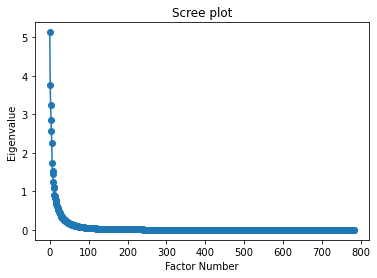

In [21]:
plt.title("Scree plot")
plt.plot(np.arange(exv.shape[0]), exv, marker='o')
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

In [ ]:
# rule of thumb

In [ ]:
# 총 분산을 설명하는 비중이 각각 70%, 80%, 90% 이기 위한 주성분 개수를 확인해보자.

In [22]:
for value in [0.7, 0.8, 0.9]:
    pca = PCA(n_components = value, svd_solver = 'full')
    X_pca = pca.fit_transform(X_train)
    exp_var_ratio = pca.explained_variance_
    print(len(exp_var_ratio))

26
43
87


In [ ]:
# 주성분의 개수가 26개일 때 총 분산의 70%를, 43개일 때 총 분산의 80%를, 그리고 87개일 때 총 분산의 90%를 설명할 수 있다

In [ ]:
# lda

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1))
lda_X.shape


(56000, 9)

In [25]:
# explained_variance_ratio_에 각 변수의 설명력을 구할 수 있다.
clf.explained_variance_ratio_

array([0.2363677 , 0.20366822, 0.1777849 , 0.10633735, 0.09493955,
       0.06921094, 0.05012553, 0.03445123, 0.02711456])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [26]:
# logistic regression
from sklearn.linear_model import LogisticRegression
import time

from sklearn.metrics import accuracy_score


특정한 틀 없이 자유롭게 해주시면 됩니다!

In [27]:
lr = LogisticRegression(max_iter=1000, random_state=42)

In [28]:
models = [lr]

In [29]:
# 원본
start = time.time()

for model in models:
    model.fit(X_train, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(X_test))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.5982857142857143
경과시간 38.73720192909241


In [30]:
#pca 변환
pca = PCA(n_components=0.80, copy=False)
pca_x = pca.fit_transform(X_train)

In [31]:
pca_test_X = pca.transform(X_test)

In [32]:
# pca  시간 측정
start = time.time()

for model in models:
    model.fit(pca_x, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(pca_test_X))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.6005714285714285
경과시간 5.3122923374176025


In [33]:
# LDA 변환
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1))

In [34]:
lda_test_X = clf.transform(X_test)

In [35]:
# lda 시간 측정
start = time.time()

for model in models:
    model.fit(lda_X, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(lda_test_X))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.8118571428571428
경과시간 2.344723701477051
